In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix   #importing sub components from sklearn library
from sklearn.model_selection import train_test_split   #importing train_test_split which we would use later  
import os

In [2]:
for dirname, _, filenames in os.walk('D:\Kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\Kaggle\funsaturday.ipynb
D:\Kaggle\heart disease prediction using logistic regression from scratch.ipynb
D:\Kaggle\heart.csv
D:\Kaggle\Untitled.ipynb
D:\Kaggle\Untitled1.ipynb
D:\Kaggle\Untitled2.ipynb
D:\Kaggle\User_Data.csv
D:\Kaggle\.ipynb_checkpoints\funsaturday-checkpoint.ipynb
D:\Kaggle\.ipynb_checkpoints\heart disease prediction using logistic regression from scratch-checkpoint.ipynb
D:\Kaggle\.ipynb_checkpoints\Untitled-checkpoint.ipynb
D:\Kaggle\.ipynb_checkpoints\Untitled1-checkpoint.ipynb
D:\Kaggle\.ipynb_checkpoints\Untitled2-checkpoint.ipynb


In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].value_counts()     #counting the number of target variables (the number of diseased vs non-diseased heart people)

1    165
0    138
Name: target, dtype: int64

Text(0.5, 1.0, 'Cholestrol Vs Trestbps')

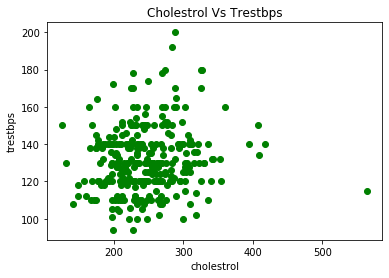

In [6]:
plt.scatter(x = 'chol', y = 'trestbps', color = 'green', data = df)  #using scatter plot to see the relationship between cholestrol and trestbps
plt.xlabel('cholestrol')    #giving the label to the x-axis                
plt.ylabel('trestbps')      #giving the label to the y-axis
plt.title('Cholestrol Vs Trestbps')  #giving a name to the title

In [7]:
df.columns                #having a look at various input features or columns 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Text(0.5, 1.0, 'Cholestrol vs Age')

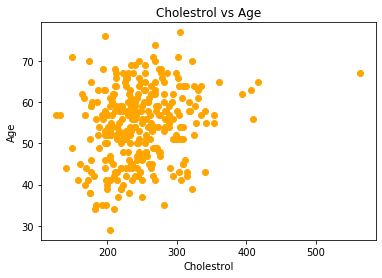

In [8]:
plt.scatter(x = 'chol', y = 'age', color = 'orange', data = df)   #using scatter plot, study the relationship between cholestrol and age
plt.xlabel('Cholestrol')        #labeling the x-axis 
plt.ylabel('Age')               #labeling the y-axis
plt.title('Cholestrol vs Age')  #giving the title to the graph

c:\users\user\anaconda3\envs\bev1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


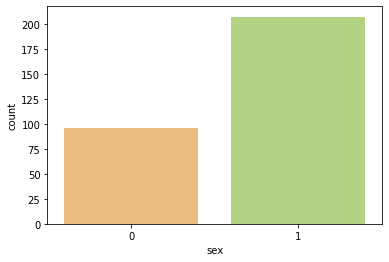

In [9]:
sns.countplot(df['sex'], palette = ("RdYlGn"))           #counting the number of male and female candidates in the dataset
#having a look at the distribution of males and females in the plot

c:\users\user\anaconda3\envs\bev1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


IndexError: tuple index out of range

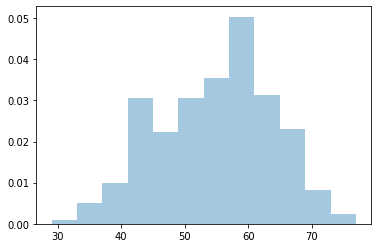

In [10]:
sns.distplot(df['age'])    

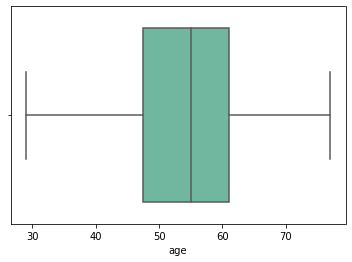

In [11]:
sns.boxplot(x = 'age', palette = "BuGn", data = df)  #using box plot to see how the age is distributed

IndexError: tuple index out of range

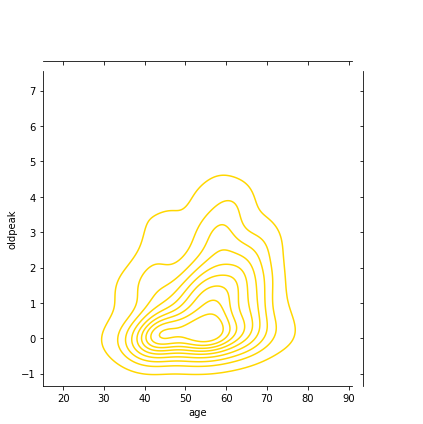

In [12]:
sns.jointplot(x = 'age', y = 'oldpeak', kind = 'kde', color = 'Gold', data = df)

In [ ]:
sns.jointplot(x = 'cp', y = 'age', kind = 'kde', color ='Green', data = df)

In [13]:
df.head(1) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [14]:
X = df.drop(['target'], axis = 1)      #take all the columns except 'target' as input vector
y = df['target']                       #take the output as the 'target' column in our dataset
ynewtest = y
xnewtest = X
y = y[:, np.newaxis]                   #converting the output to an array 
print('The shape of the input is {}'.format(X.shape))     #printing the shape of the input
print('The shape of the output is {}'.format(y.shape))    #printing the shape of the output

The shape of the input is (303, 13)
The shape of the output is (303, 1)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)


In [16]:
print('The shape of the input training set is {}'.format(X_train.shape))
print('The shape of the output training set is {}'.format(y_train.shape))
print('The shape of the input testing set is {}'.format(X_test.shape))
print('The shape of the output testing set is {}'.format(y_test.shape))

The shape of the input training set is (203, 13)
The shape of the output training set is (203, 1)
The shape of the input testing set is (100, 13)
The shape of the output testing set is (100, 1)


In [17]:
#We are initially defining the sigmoid function that could be used later
def sigmoid(z):
    
    s = 1 / (1 + np.exp(-z))
    
    return s

In [18]:
#This is a function that is used to initialize the weights with 0 and biases also with 0
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

In [19]:
#this network ensures that there is a forward propagation and at the same time, returns the cost
def propagate(w, b, X, y):
    
    m = X.shape[0]
    A = sigmoid(np.dot(X, w) + b)
    cost = -(1 / m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A)) #computing the cost function or the error function
    dw = (1 / m) * np.dot(X.T, (A - y))   #this is derivative of the cost function with respect to w
    db = (1 / m) * np.sum(A - y)          #this is the derivative of the cost function with respect to b
    grads = {'dw': dw, 'db': db}          #these values are stored in a dictionary so as to access them later
    return grads, cost 

In [20]:
#We are trying to get the parameters w and b after modifying them using the knowledge of the cost function
def optimize(w, b, X, y, num_iterations, learning_rate, print_cost = False):
    costs = []                    #This is an empty list created so that it stores all the values later
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, y)       #we are calling the previously defined function 
        dw = grads['dw']                          #we are accessing the derivatives of cost with respect to w
        db = grads['db']                          #we are accessing the derivatives of cost with respect to b
        w = w - learning_rate * dw                #we are modifying the parameter w so that the cost would reduce in the long run
        b = b - learning_rate * db                #we are modifying the parameter b so that the cost would reduce in the long run
        np.squeeze(cost)
        if i % 100 == 0:
            costs.append(cost)                    #we are giving all the cost values to the empty list that was created initially
        if print_cost and i % 1000 == 0:
            print("cost after iteration {}: {}".format(i, cost))
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    params = {'w': w, 'b': db}                    #we are storing this value in the dictionary so that it could be accessed later
    grads = {'dw': dw, 'db': db}                  #we are storing these valeus in the dictionary so that they could be accessed later
    return params, grads, costs

In [21]:
#This is a function that gives 1 if the prediction is greater than 0.5 and 0 otherwise
def predict(w, b, X):
    m = X.shape[0]
    y_prediction = np.zeros((m, 1))
    A = sigmoid(np.dot(X, w) + b)
    for i in range(A.shape[0]):
        if (A[i, 0] <= 0.5):
            y_prediction[i, 0] = 0
        else:
            y_prediction[i, 0] = 1
            
    return y_prediction

In [22]:
def model(X_train, X_test, y_train, y_test, num_iterations, learning_rate, print_cost = True):
    w, b = initialize_with_zeros(X.shape[1])
    parameters, grads, costs = optimize(w, b, X, y, num_iterations, learning_rate, print_cost = True)
    w = parameters["w"]
    b = parameters["b"]
    y_prediction_test = predict(w, b, X_test)
    y_prediction_train = predict(w, b, X_train)
    
    print('train accuracy: {}'.format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print('test accuracy: {}'.format("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100)))
    
    d = {"costs": costs,
         "y_prediction_test": y_prediction_test, 
         "y_prediction_train" : y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

cost after iteration 0: 0.6931471805599453
cost after iteration 1000: 0.965534532295935
cost after iteration 2000: 0.9508696650310838
cost after iteration 3000: 0.9362989882110282
cost after iteration 4000: 0.9218476136433525
cost after iteration 5000: 0.907548264488509
cost after iteration 6000: 0.8934167035397759
cost after iteration 7000: 0.8794627581262182
cost after iteration 8000: 0.8656942017313857
cost after iteration 9000: 0.8521179170030688
cost after iteration 10000: 0.838740178451589
cost after iteration 11000: 0.8255666895339443
cost after iteration 12000: 0.8126025740661691
cost after iteration 13000: 0.7998523758548024
cost after iteration 14000: 0.7873200741514835
cost after iteration 15000: 0.7750091098858778
cost after iteration 16000: 0.7629224160609583
cost after iteration 17000: 0.7510624474171196
cost after iteration 18000: 0.7394312067414167
cost after iteration 19000: 0.7280302670743284
cost after iteration 20000: 0.716860790306819
cost after iteration 21000: 0.

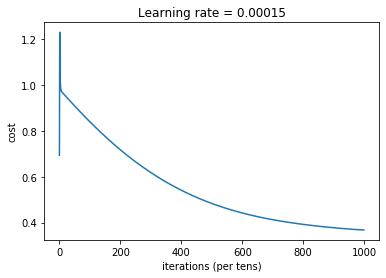

train accuracy: 85.22167487684729
test accuracy: test accuracy: 88.0 %


In [23]:
d = model(X_train, X_test, y_train, y_test, num_iterations = 100000, learning_rate = 0.00015, print_cost = True)

In [24]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [25]:
xpred = xnewtest
ypred = ynewtest
i = 300         #play around with this number to access each row in the training and test set and check the accuracy
xnewpred = xpred.iloc[i]
ynewpred = ypred.iloc[i]
print('The input values of the features are:')
print(xnewpred)
print('The actual output whether a person has a heart disease or not is:')
print(float(ynewpred))
xnewpred = xnewpred[:, np.newaxis]
xnewpred = xnewpred.T
ynew = predict(d["w"], d["b"], xnewpred)
print('The output of the predicted value is:')
print(ynew[0][0])

The input values of the features are:
age          68.0
sex           1.0
cp            0.0
trestbps    144.0
chol        193.0
fbs           1.0
restecg       1.0
thalach     141.0
exang         0.0
oldpeak       3.4
slope         1.0
ca            2.0
thal          3.0
Name: 300, dtype: float64
The actual output whether a person has a heart disease or not is:
0.0
The output of the predicted value is:
0.0


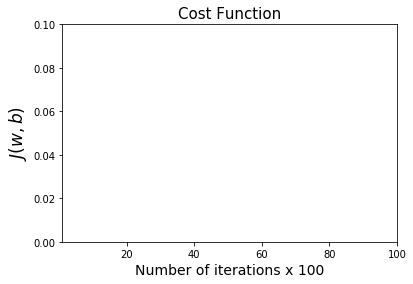

In [28]:
plt.plot(d["costs"])
plt.xlim([1,100])
plt.ylim([0,0.10])
plt.title("Cost Function",fontsize = 15)
plt.xlabel("Number of iterations x 100", fontsize = 14)
plt.ylabel("$J(w,b)$", fontsize = 17)
plt.show()